In [1]:
%run ../setup.ipynb

In [2]:
import soundfile as sf

In [264]:
x, fs = sf.read('../ch09-convtheorem/50712__rutgermuller__drums-breakbeat-1.wav')
#x, fs = sf.read('/home/bmcfee/Desktop/estring.wav')

In [265]:
Audio(data=x, rate=fs)

In [266]:
# Filter at 500 Hz

ripple = 1
atten = 150

order, fc = scipy.signal.ellipord(400, 401, ripple, atten, fs=fs)

sos = scipy.signal.ellip(order, ripple, atten, fc, fs=fs, output='sos')

(0.0, 800.0)

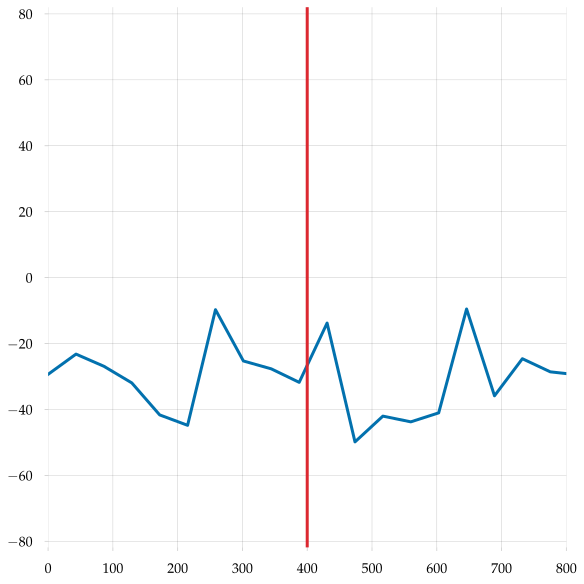

In [267]:
z, p, k = scipy.signal.sos2zpk(sos)
b, a = scipy.signal.sos2tf(sos)

w, gd = scipy.signal.group_delay([b, a], fs=fs)

plt.plot(w, gd)
plt.axvline(fc, color=colors[1])
plt.xlim([0, 2*fc])

In [268]:
y = scipy.signal.sosfilt(sos, x)

In [269]:
Audio(data=y, rate=fs)

In [270]:
y2 = scipy.signal.sosfiltfilt(sos, x)

In [271]:
Audio(data=y2, rate=fs)